# Notes of Matplotlib and Seaborn Plotting

In [43]:
# Necessary data analysis pacakges

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

% matplotlib inline

In [3]:
# Read in data into a DataFrame

df = pd.read_csv("Superstore.csv", encoding = "ISO-8859-1")

### Basic Numerical Summaries

In [7]:
# the pandas.head() method allows us to view a few rows of the DataFrame structure

df.head()

,Category,City,Container,Customer ID,Customer Name,Customer Segment,Department,Item ID,Item,Order Date,...,Ship Date,Ship Mode,State,Discount,Order Quantity,Product Base Margin,Profit,Sales,Shipping Cost,Unit Price
0,Paper,Lombard,Small Box,3035,Mark Bailey,Home Office,Office Supplies,10074,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,11/8/2016,...,11/9/2016,Regular Air,Illinois,0.01,10,0.36,-76,53,5,5
1,Paper,Lombard,Wrap Bag,3035,Mark Bailey,Home Office,Office Supplies,10079,Telephone Message Books with Fax/Mobile Sectio...,11/11/2014,...,11/12/2014,Regular Air,Illinois,0.04,12,0.39,52,76,1,6
2,Pens & Art Supplies,Southbury,Wrap Bag,3385,Daniel Richmond,Corporate,Office Supplies,11012,"Premium Writing Pencils, Soft, #2 by Central A...",11/23/2015,...,11/23/2015,Express Air,Connecticut,0.04,5,0.57,-22,16,2,3
3,Binders and Binder Accessories,Coachella,Small Box,3133,Kristine Singleton,Corporate,Office Supplies,10646,Fellowes Black Plastic Comb Bindings,1/13/2016,...,1/25/2016,Regular Air,California,0.10,12,0.39,-350,65,8,6
4,Rubber Bands,Coachella,Wrap Bag,3133,Kristine Singleton,Corporate,Office Supplies,10138,Assorted Color Push Pins,1/13/2016,...,1/25/2016,Regular Air,California,0.03,10,0.52,4,19,1,2


In [5]:
# pandas.describe() gives basics summary statistics of the data. 

df.describe()

,Customer ID,Item ID,Order ID,Postal Code,Discount,Order Quantity,Product Base Margin,Profit,Sales,Shipping Cost,Unit Price
count,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000
mean,1738.422236,10734.269998,82318.489073,47136.702313,0.049628,13.798430,0.508277,139.233503,949.716423,12.813601,88.286123
std,979.167197,340.712162,19149.448857,32079.511571,0.031798,15.107688,0.141901,998.486307,2598.020092,17.171179,281.537536
min,2.000000,10001.000000,6.000000,1001.000000,0.000000,1.000000,0.000000,-16477.000000,1.000000,0.000000,1.000000
25%,898.000000,10470.000000,86737.250000,18040.000000,0.020000,5.000000,0.380000,-74.000000,61.000000,3.000000,6.000000
50%,1750.000000,10767.500000,88344.500000,46322.000000,0.050000,10.000000,0.520000,3.000000,203.000000,6.000000,21.000000
75%,2578.750000,11027.000000,89987.750000,76037.000000,0.080000,17.000000,0.590000,140.000000,776.000000,14.000000,86.000000
max,3403.000000,11263.000000,91591.000000,99362.000000,0.250000,170.000000,0.850000,16332.000000,100119.000000,165.000000,6783.000000


### Matplotlib subplot()

In [10]:
# Convert the order date column to the datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set Order Date as DataFrame index
df.set_index(['Order Date'], inplace = True)

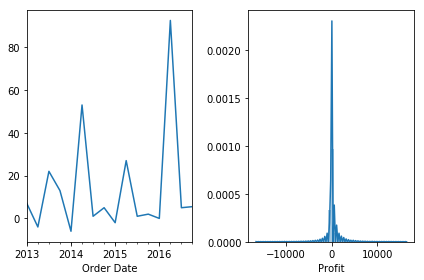

In [29]:
# Basic subplots 
plt.subplot(1, 2, 1)

df['Profit'].resample('Q').median().plot()

plt.subplot(1, 2, 2)

sns.distplot(df['Profit'])
plt.tight_layout()

plt.show()

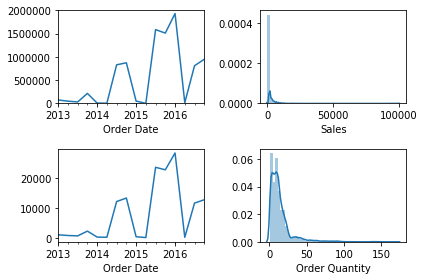

In [38]:
# 2x2 subplot grid 
plt.subplot(2,2,1)
df['Sales'].resample('Q').sum().plot()

# settings axis limits
plt.ylim([0, 2000000])
# plt.axis([1990, 2010, 0, 50])

plt.subplot(2,2,2)
sns.distplot(df['Sales'])

plt.subplot(2,2,3)
df['Order Quantity'].resample('Q').sum().plot()

plt.subplot(2,2,4)
sns.distplot(df['Order Quantity'])

plt.tight_layout()
plt.show()

In [61]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# output to static HTML file
output_file("lines.html")

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend="Temp.", line_width=2)

# show the results
show(p)

In [62]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [68]:
x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x*30)

In [69]:
p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y, color="#2222aa", line_width=3)

In [70]:
def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()

In [71]:
show(p, notebook_handle=True)

In [67]:
interact(update, f=["sin", "cos", "tan"], w=(0,100), A=(1,5), phi=(0, 20, 0.1))

A Jupyter Widget

<function __main__.update>

In [79]:
def f(x):
    print(df.Discount[x])

In [80]:
interact(f, x=10);

A Jupyter Widget